In [4]:
import scipy, numpy as np, matplotlib.pyplot as plt, glob, sys, os
import pandas as pd, seaborn as sns, argparse, pyemma as py, pickle, copy
import mdtraj as md

sys.path.insert(1, '../msms/')
from utils import * 

Using TensorFlow backend.


In [5]:
def get_all_wcs(num_bp, b_idx, strand=1):
    '''return idxs of all available pairs for a given abasic'''
    
    wc_list = []
    diag_list = []
    strand1 = [i for i in np.arange(num_bp)]
    strand2 = [i for i in np.arange(num_bp)]
    
    if b_idx > 0:
        strand1 = strand1[:b_idx-1] + strand1[b_idx:] 
        
    idx = 0
    for b1 in strand1:
        for b2 in strand2:
            if b1 + b2 == num_bp-1:
                wc_list.append(idx)
            if b1 == b2:
                diag_list.append(idx)
            idx+= 1
            
    return wc_list, diag_list

def get_temp(seq, base):
    '''look up temperature in corresponding seq/base dist file'''
    
    path = f'../abasic_dists/{seq}_msm_add-Tms/{base}*'
    path = glob.glob(path)[0]
    temp = int(path.split('T-')[-1][:3])
    return temp

def nbps_fes(nbps, temp):
    '''generate fes from discrete probability density'''
    
    kb = 8.3124 / 1000
    prob_hist, bins = np.histogram(nbps, bins=12, range=(0, 12))
    fes_hist = -kb*temp*np.log(prob_hist)
    fes_hist = fes_hist - fes_hist[0]
    
    return bins[:-1], fes_hist

def score_native_contacts(dists, bidx, bp_cutoff):
    '''only score native WC contacts'''
    
    all_wc_idxs, all_diag_idxs = get_all_wcs(num_bp, bidx)
    all_wc_dists = np.concatenate(dists)[:, all_wc_idxs]
    all_wc_nbps = np.sum(all_wc_dists < bp_cutoff, axis=1)
    return all_wc_nbps
    

def score_all_contacts(dists, base, AT_cutoff=0.7, GC_cutoff=0.65):
    '''assign A:T and G:C scores by summing all available contacts below respective cutoffs'''
    
    # find possible AT and GC pairs
    complement_dict = {'A':'T', 'T':'A', 'G':'C', 'C':'G'}
    dists = np.concatenate(dists)

    s1_bps = [t for t in seq]
    s2_bps = [complement_dict[t] for t in reversed(seq)]
    if base != 'control':
        del s1_bps[int(base.replace('b', ''))-1]

    idx = 0
    all_sums = np.zeros(len(dists))
    for b1 in s1_bps:
        AT_possible, GC_possible = [], []
        for b2 in s2_bps:
            if b1+b2 in ['AT', 'TA']:
                AT_possible.append(idx)
            elif b1+b2 in ['GC', 'CG']:
                GC_possible.append(idx)
            idx+=1
                
        AT_sums = np.sum((dists[:, AT_possible] < AT_cutoff), axis=1) > 0
        GC_sums = np.sum((dists[:, GC_possible] < GC_cutoff), axis=1) > 0
        all_sums += AT_sums + GC_sums        
            
    return all_sums

def get_microstate_coords(cv1, cv2, dtraj):
    '''return average committor value for a given set of 2D coordinates'''
    
    micro_avgs = []
    for i in range(max(dtraj)+1):
        micro_idxs = np.where(dtraj==i)
        cv1_avg, cv2_avg = np.mean(cv1[micro_idxs]), np.mean(cv2[micro_idxs])
        micro_avgs.append([cv1_avg, cv2_avg])
    
    return np.array(micro_avgs)

print(get_all_wcs(11, 0))
print(get_all_wcs(11, 2))

#score = score_all_contacts(equ_dists, base)
#print(score.shape, score.mean())scipy, numpy as np, matplotlib.pyplot as plt, glob, sys, os


([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120])
([10, 19, 29, 39, 49, 59, 69, 79, 89, 99], [0, 13, 25, 37, 49, 61, 73, 85, 97, 109])


W1117 10:56:34.590138 139924493793088 deprecation_wrapper.py:119] From /home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1117 10:56:34.611486 139924493793088 deprecation_wrapper.py:119] From /home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1117 10:56:34.883119 139924493793088 deprecation_wrapper.py:119] From /home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1117 10:56:34.884198 139924493793088 deprecation_wrapper.py:119] From /home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/backend

CGCATATATAT control
loaded dists   (25, 100000, 121)
[1.00157282 1.00153911 1.00153911]
CGCATATATAT b2
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.91551828 0.91551828 0.91551828]
CGCATATATAT b4
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.99305889 0.99305889 0.99305889]
CGCATATATAT b6
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.99269745 0.99277204 0.99281855]


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


CCTATATATCC control
loaded dists   (25, 100000, 121)
[0.97144945 0.97144945 0.97145067]
CCTATATATCC b2
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.98737652 0.98737652 0.98737652]
CCTATATATCC b4
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.98616954 0.98579931 0.98616954]
CCTATATATCC b6
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[1.02132234 1.02143567 1.02132234]


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


TATAGCGATAT control
loaded dists   (25, 100000, 121)
[0.98685602 0.98685049 0.98685756]
TATAGCGATAT b2
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.98647078 0.98647078 0.98647078]
TATAGCGATAT b4
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.9851493  0.98515626 0.98515626]
TATAGCGATAT b6
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.99230663 0.99230663 0.99230999]
TTTTTTTTTTT control
loaded dists   (25, 100000, 121)
[0.99467162 0.99472311 0.99472311]
TTTTTTTTTTT b2
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.99145399 0.99145399 0.99145399]
TTTTTTTTTTT b4
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.9970106  0.99727212 0.9970106 ]
TTTTTTTTTTT b6
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


[0.99527506 0.99527506 0.99530493]


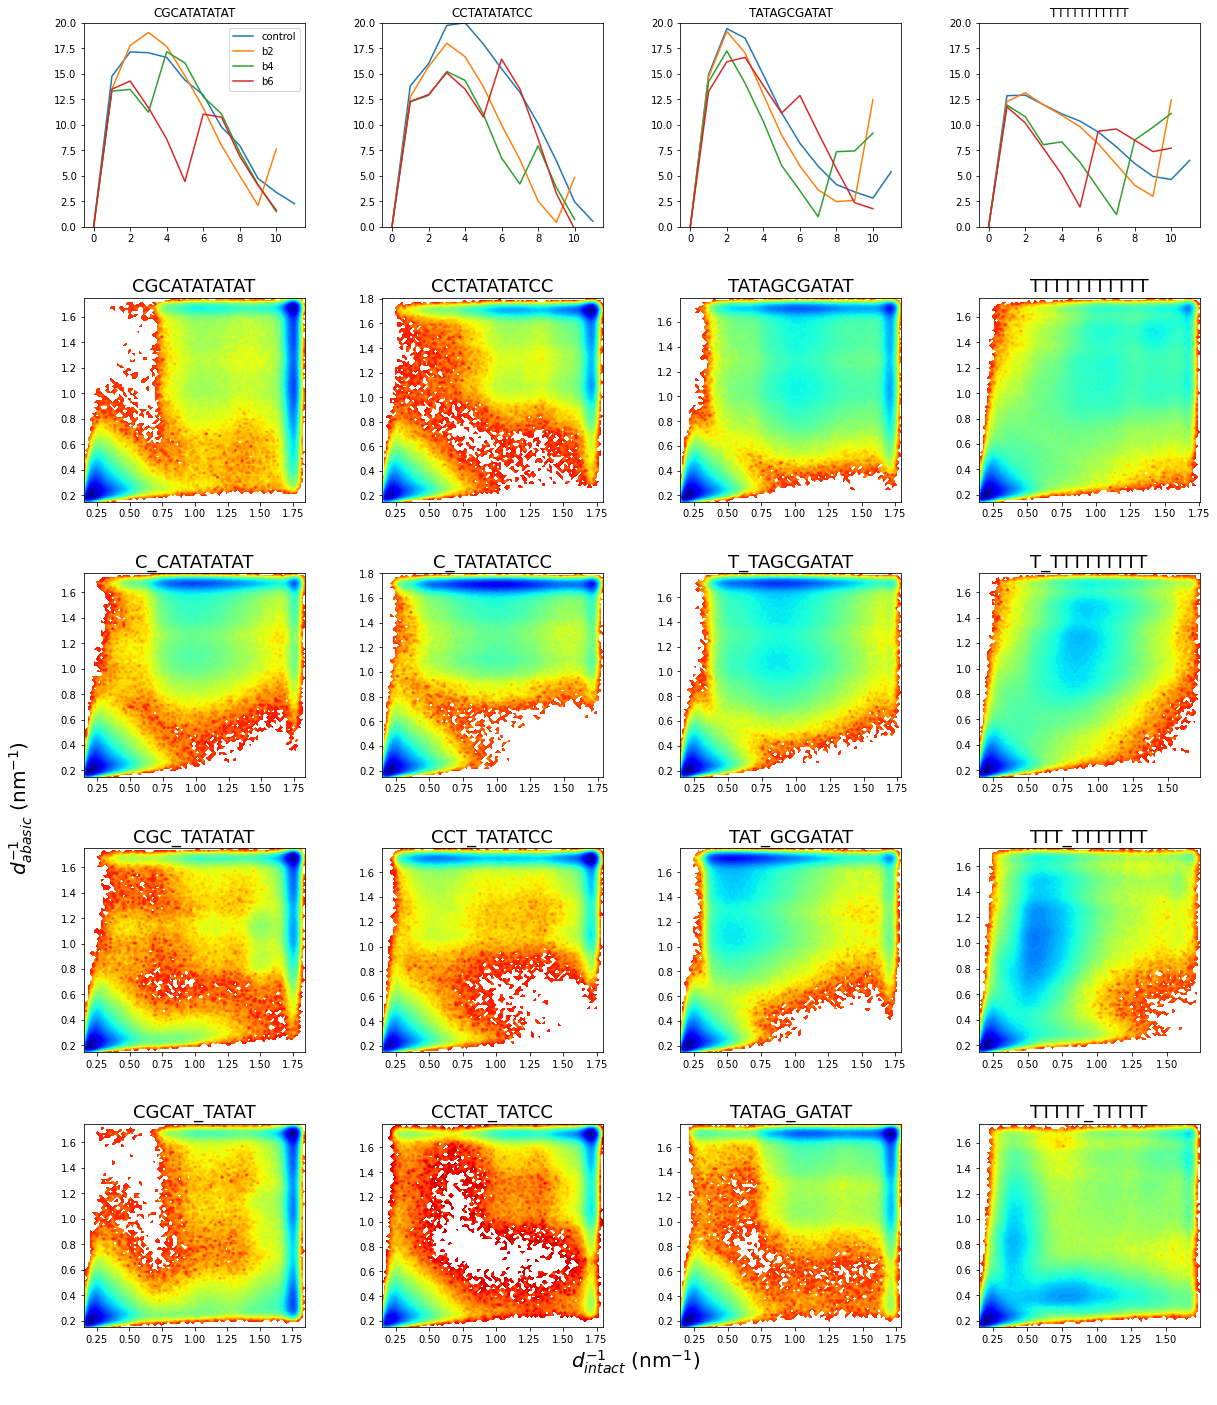

In [6]:

num_bp = 11
lag = 1
pstride = 1
bp_cutoff = 0.8
kb = 8.3124 / 1000
save_npys = False

seq_list = ['CGCATATATAT', 'CCTATATATCC', 'TATAGCGATAT', 'TTTTTTTTTTT'] #['TTTTTTTTTTT'] #
base_idxs = [0, 2, 4, 6]
base_list = ['control', 'b2', 'b4', 'b6']
wc_idxs = np.array([10,19,28,37,47,57,67,77])
shift2_5p_idxs = np.array([21,30,39,59,79])
shift2_3p_idxs = np.array([8,17,26,35,55])

max_frames = 100000

fig, axes = plt.subplots(5, 4, figsize=(20, 24))

for seq, ax_row in zip(seq_list, axes.T):
    
    save_name = f'./save_outputs/{seq}_lag-{lag}_dict'
    save_dict = pickle.load(open(save_name, 'rb'))
    
    dtraj_list = save_dict['dtraj_list']
    commitor_list = save_dict['committor_list']
    msm_list = save_dict['msm_list']
    
    nbps_ax = ax_row[0]
    for base, bidx, dtraj, commitor, msm, ax in zip(
        base_list, base_idxs, dtraj_list, commitor_list, msm_list, ax_row[1:]):
        
        # load from dists files directly
        print(seq, base)
        dists_path = glob.glob(f'../abasic_dists/{seq}_msm_add-Tms/{base}_*')[0]
        temp = int(dists_path.split('_T-')[-1][:3])
        equ_dists = np.load(dists_path)[:, -max_frames:, :]
        print('loaded dists  ', equ_dists.shape)
        
        # get all wc pairs for nbps plots:
        all_wc_nbps = score_all_contacts(equ_dists, base, AT_cutoff=0.7, GC_cutoff=0.65)
        bins, fes = nbps_fes(all_wc_nbps, temp)
        
        # plot the nbps fes
        nbps_ax.plot(bins, fes, label=base)
        nbps_ax.set_title(seq)
        nbps_ax.set_ylim(0, 20)
        
        # isolate only the shared features
        common_idxs = translate_pairs(11, base)
        equ_dists = np.concatenate(equ_dists)[::pstride, common_idxs]
        
        # generates putative CVs
        hbr_dists = 1/np.mean(equ_dists[:, wc_idxs], axis=1)
        fray_up_dists = 1/np.mean(equ_dists[:, wc_idxs[[0, 1, 2]]], axis=1)
        fray_down_dists = 1/np.mean(equ_dists[:, wc_idxs[[-5, -3, -1]]], axis=1)
        core_dists = 1/np.mean(equ_dists[:, wc_idxs[[2, -5]]], axis=1)
        fray_both_dists = 1/np.mean(equ_dists[:, wc_idxs[[0, 1, -3, -1]]], axis=1)
        
        # define weights in terms of stationary probabilities
        stat_dtr = msm.stationary_distribution
        sample_dtr, _ = np.histogram(dtraj, bins=len(stat_dtr), density=True)
        weights = (stat_dtr / sample_dtr)[dtraj]
        print(weights[:3])
        
        # plot a 2D putative CV landscape
        #py.plots.plot_free_energy(hbr_dists, fray_dists, ax=ax)
        py.plots.plot_free_energy(fray_up_dists, fray_down_dists, weights=weights,
                                  ax=ax, vmin=0.0, vmax=12, cbar=False, cmap='jet')

        if base=='control': abasic_label= seq
        else:       abasic_label= f'{seq[:bidx-1]}_{seq[bidx:]}'
        ax.set_title(abasic_label, fontsize=18)
        
        # save cvs as npys
        if save_npys:
            npy_save_name = f'./save_cvs/cvs_{seq}_{base}.npy'
            dtraj_save_name = f'./save_cvs/draj_{seq}_{base}.npy'
            commit_save_name = f'./save_cvs/commit_{seq}_{base}.npy'
            np.save(npy_save_name, np.array([fray_up_dists, fray_down_dists]))
            np.save(dtraj_save_name, dtraj)
            np.save(commit_save_name, commitor)
            print(np.shape(dtraj), np.shape(commitor))
            
        
axes[0, 0].legend()
spaces = ' '*45
axes[3, 0].set_ylabel(spaces+r'$d_{abasic}^{-1}$ (nm$^{-1}$)' + '\n', fontsize=20)
axes[-1, 1].set_xlabel(spaces+r'$d_{intact}^{-1}$ (nm$^{-1}$)' + '\n', fontsize=20)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

plt.savefig('./figs/FES_frayed.pdf', dpi=600)
plt.savefig('./figs/FES_frayed.png', dpi=600)

/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


CGCATATATAT control
[1.00157282 1.00153911 1.00153911]
CGCATATATAT b2
[0.91551828 0.91551828 0.91551828]
CGCATATATAT b4
[0.99305889 0.99305889 0.99305889]
CGCATATATAT b6
[0.99269745 0.99277204 0.99281855]
CCTATATATCC control
[0.97144945 0.97144945 0.97145067]
CCTATATATCC b2
[0.98737652 0.98737652 0.98737652]
CCTATATATCC b4
[0.98616954 0.98579931 0.98616954]
CCTATATATCC b6
[1.02132234 1.02143567 1.02132234]
TATAGCGATAT control
[0.98685602 0.98685049 0.98685756]
TATAGCGATAT b2
[0.98647078 0.98647078 0.98647078]
TATAGCGATAT b4
[0.9851493  0.98515626 0.98515626]
TATAGCGATAT b6
[0.99230663 0.99230663 0.99230999]
TTTTTTTTTTT control
[0.99467162 0.99472311 0.99472311]
TTTTTTTTTTT b2
[0.99145399 0.99145399 0.99145399]
TTTTTTTTTTT b4
[0.9970106  0.99727212 0.9970106 ]
TTTTTTTTTTT b6
[0.99527506 0.99527506 0.99530493]


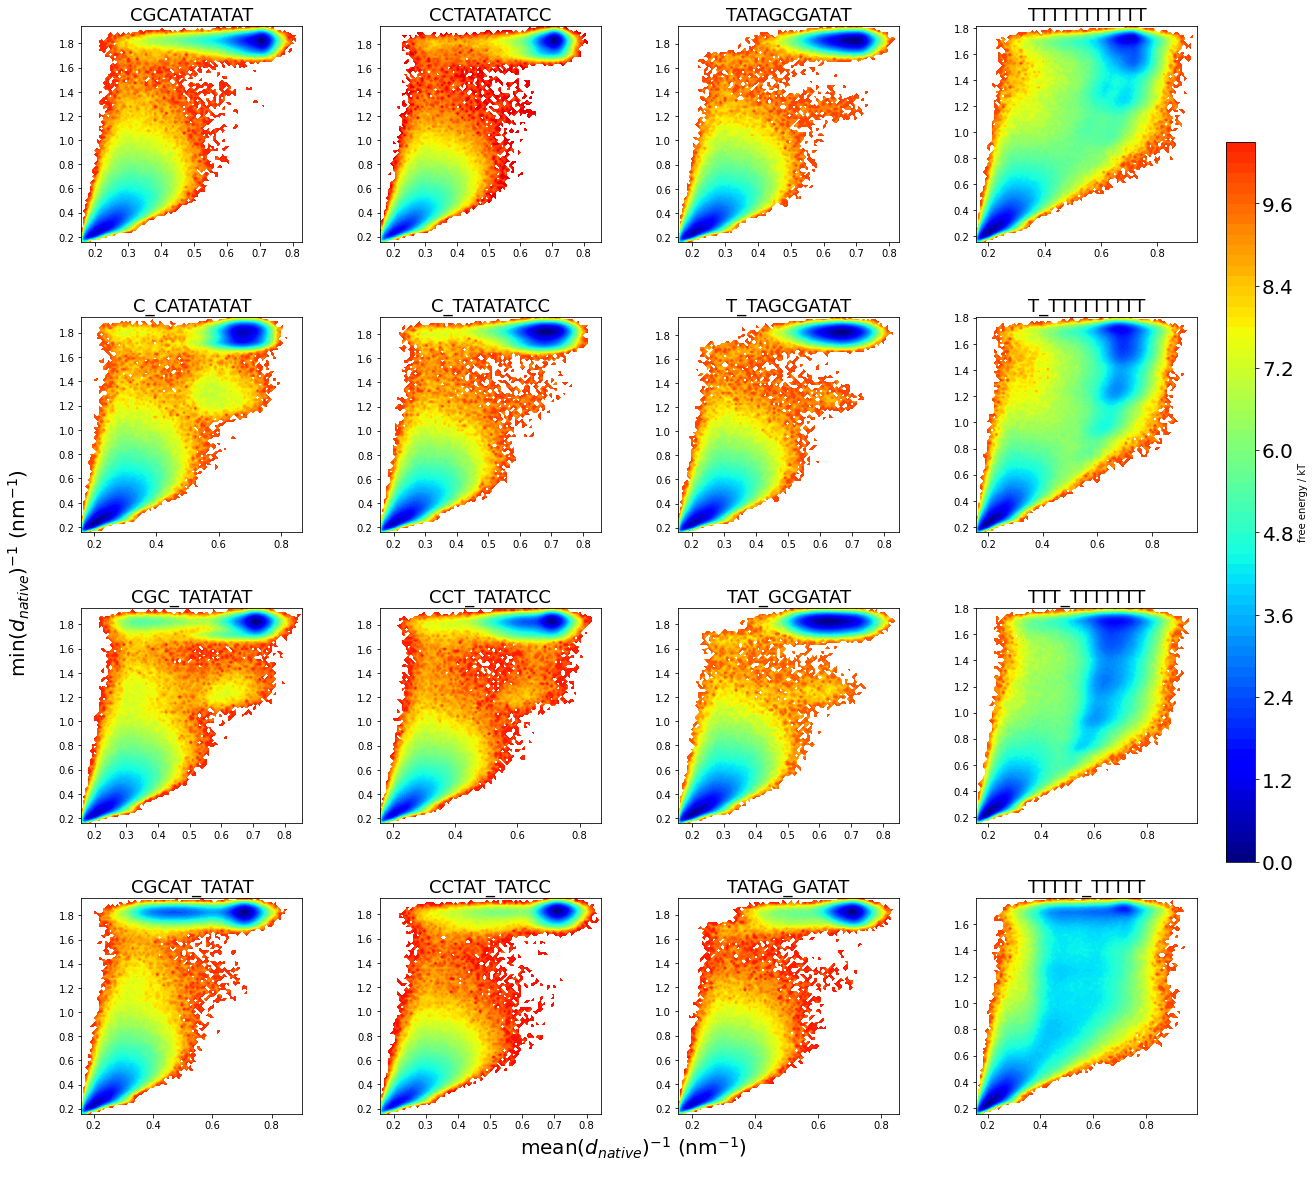

In [6]:
# plot frayed with 1D projections and with colorbar

# plot shifted distributions as addtional CVs

num_bp = 11
lag = 1
pstride = 1
bp_cutoff = 0.8
kb = 8.3124 / 1000
save_npys = False

seq_list = ['CGCATATATAT', 'CCTATATATCC', 'TATAGCGATAT', 'TTTTTTTTTTT'] #['TTTTTTTTTTT'] #
base_idxs = [0, 2, 4, 6]
base_list = ['control', 'b2', 'b4', 'b6']
wc_idxs = np.array([10,19,28,37,47,57,67,77])
shift2_5p_idxs = np.array([21,30,39,59,79])
shift2_3p_idxs = np.array([8,17,26,35,55])

max_frames = 100000

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
cax = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cax.tick_params(labelsize=20)
cax.tick_params(labelsize=20)

for seq, ax_row in zip(seq_list, axes.T):
    
    save_name = f'./save_outputs/{seq}_lag-{lag}_dict'
    save_dict = pickle.load(open(save_name, 'rb'))
    
    dtraj_list = save_dict['dtraj_list']
    commitor_list = save_dict['committor_list']
    msm_list = save_dict['msm_list']

    for base, bidx, dtraj, commitor, msm, ax in zip(
        base_list, base_idxs, dtraj_list, commitor_list, msm_list, ax_row):
        
        # load from dists files directly
        print(seq, base)
        dists_path = glob.glob(f'../abasic_dists/{seq}_msm_add-Tms/{base}_*')[0]
        temp = int(dists_path.split('_T-')[-1][:3])
        equ_dists = np.load(dists_path)[:, -max_frames:, :]
        
        # isolate only the shared features
        common_idxs = translate_pairs(11, base)
        equ_dists = np.concatenate(equ_dists)[::pstride, common_idxs]
        
        '''
        fray_up_dists = 1/np.mean(equ_dists[:, wc_idxs[[0, 1, 2]]], axis=1)
        fray_down_dists = 1/np.mean(equ_dists[:, wc_idxs[[-5, -3, -1]]], axis=1) 
        xtxt = r'$d_{intact}^{-1}$ (nm$^{-1}$)'
        ytxt = r'$d_{abasic}^{-1}$ (nm$^{-1}$)'
        '''
        
        # compare paired distances vs. all distance
        fray_up_dists = 1/np.mean(equ_dists[:, :], axis=1)
        fray_down_dists = 1/np.min(equ_dists[:, wc_idxs], axis=1)
        xtxt = r'mean($d_{native})^{-1}$ (nm$^{-1}$)'
        ytxt = r'min($d_{native})^{-1}$ (nm$^{-1}$)'
        
        # define weights in terms of stationary probabilities
        stat_dtr = msm.stationary_distribution
        sample_dtr, _ = np.histogram(dtraj, bins=len(stat_dtr), density=True)
        weights = (stat_dtr / sample_dtr)[dtraj]
        print(weights[:3])
        
        # plot a 2D putative CV landscape
        #py.plots.plot_free_energy(hbr_dists, fray_dists, ax=ax)
        if seq==seq_list[0] and base==base_list[0]: cbar = True
        else: cbar = False
        py.plots.plot_free_energy(fray_up_dists, fray_down_dists, weights=weights,
                                  ax=ax, vmin=0.0, vmax=12, cbar=cbar, cax=cax, cmap='jet')

        if base=='control': abasic_label= seq
        else:       abasic_label= f'{seq[:bidx-1]}_{seq[bidx:]}'
        ax.set_title(abasic_label, fontsize=18)
        
        # save cvs as npys
        if save_npys:
            npy_save_name = f'./save_cvs/cvs_{seq}_{base}.npy'
            dtraj_save_name = f'./save_cvs/draj_{seq}_{base}.npy'
            commit_save_name = f'./save_cvs/commit_{seq}_{base}.npy'
            np.save(npy_save_name, np.array([fray_up_dists, fray_down_dists]))
            np.save(dtraj_save_name, dtraj)
            np.save(commit_save_name, commitor)
            print(np.shape(dtraj), np.shape(commitor))
            
        
spaces = ' '*45

axes[2, 0].set_ylabel(spaces + ytxt + '\n', fontsize=20)
axes[-1, 1].set_xlabel(spaces + xtxt + '\n', fontsize=20)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

plt.savefig('./figs/FES_frayed.pdf', dpi=600)
plt.savefig('./figs/FES_frayed.png', dpi=600)

/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


CGCATATATAT control
[1.00157282 1.00153911 1.00153911]
CGCATATATAT b2
[0.91551828 0.91551828 0.91551828]
CGCATATATAT b4
[0.99305889 0.99305889 0.99305889]
CGCATATATAT b6
[0.99269745 0.99277204 0.99281855]
CCTATATATCC control
[0.97144945 0.97144945 0.97145067]
CCTATATATCC b2
[0.98737652 0.98737652 0.98737652]
CCTATATATCC b4
[0.98616954 0.98579931 0.98616954]
CCTATATATCC b6
[1.02132234 1.02143567 1.02132234]
TATAGCGATAT control
[0.98685602 0.98685049 0.98685756]
TATAGCGATAT b2
[0.98647078 0.98647078 0.98647078]
TATAGCGATAT b4
[0.9851493  0.98515626 0.98515626]
TATAGCGATAT b6
[0.99230663 0.99230663 0.99230999]
TTTTTTTTTTT control
[0.99467162 0.99472311 0.99472311]
TTTTTTTTTTT b2
[0.99145399 0.99145399 0.99145399]
TTTTTTTTTTT b4
[0.9970106  0.99727212 0.9970106 ]
TTTTTTTTTTT b6
[0.99527506 0.99527506 0.99530493]


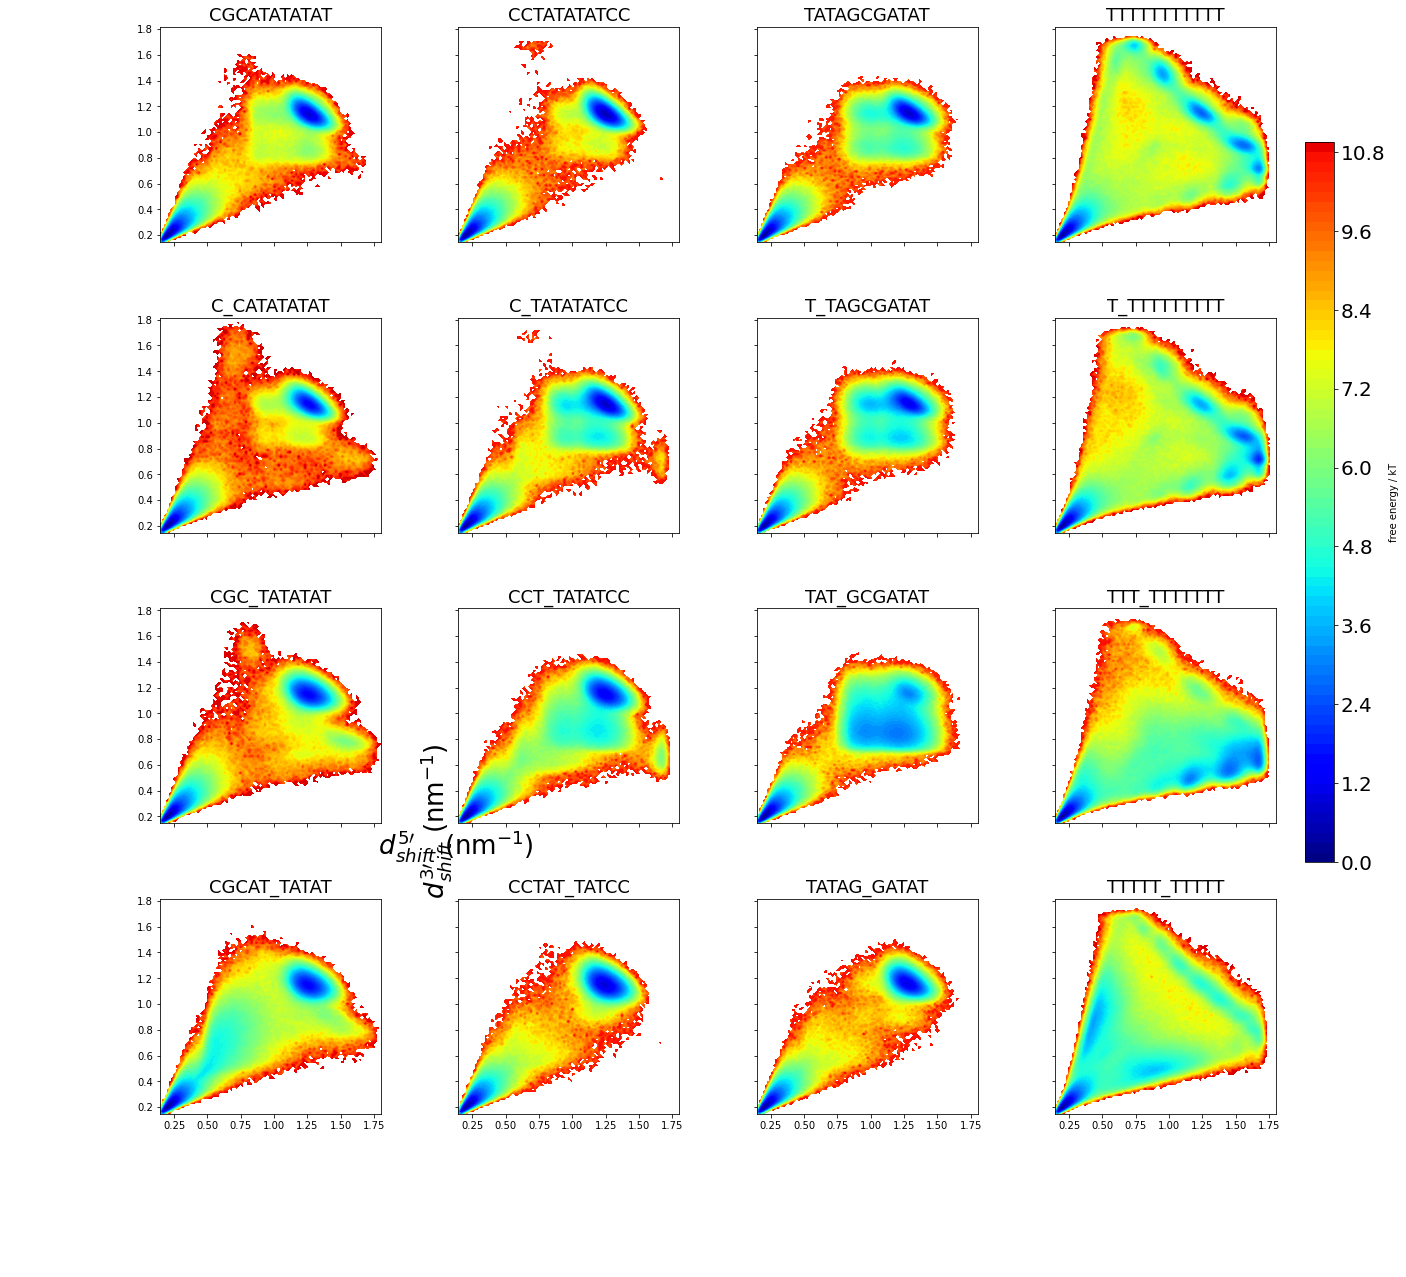

In [9]:
# plot shifted distributions as addtional CVs

num_bp = 11
lag = 1
pstride = 1
bp_cutoff = 0.8
kb = 8.3124 / 1000
save_npys = True

seq_list = ['CGCATATATAT', 'CCTATATATCC', 'TATAGCGATAT', 'TTTTTTTTTTT'] #['TTTTTTTTTTT'] #
base_idxs = [0, 2, 4, 6]
base_list = ['control', 'b2', 'b4', 'b6']
wc_idxs = np.array([10,19,28,37,47,57,67,77])
shift2_5p_idxs = np.array([30,39,59]) #np.array([21,30,39,59,79])
shift2_3p_idxs = np.array([17,26,35])  #np.array([8,17,26,35,55])

max_frames = 100000

fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True, sharex=True)
cax = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cax.tick_params(labelsize=20)
cax.tick_params(labelsize=20)

for seq, ax_row in zip(seq_list, axes.T):
    
    save_name = f'./save_outputs/{seq}_lag-{lag}_dict'
    save_dict = pickle.load(open(save_name, 'rb'))
    
    dtraj_list = save_dict['dtraj_list']
    commitor_list = save_dict['committor_list']
    msm_list = save_dict['msm_list']

    for base, bidx, dtraj, commitor, msm, ax in zip(
        base_list, base_idxs, dtraj_list, commitor_list, msm_list, ax_row):
        
        # load from dists files directly
        print(seq, base)
        dists_path = glob.glob(f'../abasic_dists/{seq}_msm_add-Tms/{base}_*')[0]
        temp = int(dists_path.split('_T-')[-1][:3])
        equ_dists = np.load(dists_path)[:, -max_frames:, :]
        
        # isolate only the shared features
        common_idxs = translate_pairs(11, base)
        equ_dists = np.concatenate(equ_dists)[::pstride, common_idxs]
        
        shift2_5p_dists = 1/np.mean(equ_dists[:, shift2_5p_idxs], axis=1)
        shift2_3p_dists = 1/np.mean(equ_dists[:, shift2_3p_idxs], axis=1)
        
        # define weights in terms of stationary probabilities
        stat_dtr = msm.stationary_distribution
        sample_dtr, _ = np.histogram(dtraj, bins=len(stat_dtr), density=True)
        weights = (stat_dtr / sample_dtr)[dtraj]
        print(weights[:3])
        
        # plot a 2D putative CV landscape
        #py.plots.plot_free_energy(hbr_dists, fray_dists, ax=ax)
        if seq==seq_list[0] and base==base_list[0]: cbar = True
        else: cbar = False
        py.plots.plot_free_energy(shift2_5p_dists, shift2_3p_dists, weights=weights,
                                  ax=ax, vmin=0.0, vmax=12, cbar=cbar, cax=cax, cmap='jet')

        if base=='control': abasic_label= seq
        else:       abasic_label= f'{seq[:bidx-1]}_{seq[bidx:]}'
        ax.set_title(abasic_label, fontsize=18)
        
        # save cvs as npys
        if save_npys:
            npy_save_name = f'./save_cvs/shifted_{seq}_{base}.npy'
            np.save(npy_save_name, np.array([shift2_5p_dists, shift2_3p_dists]))
        
spaces = ' '*45
axes[2, 0].set_xlabel(spaces+r'$d_{shift}^{5\prime}$ (nm$^{-1}$)' + '\n', fontsize=26)
axes[-1, 1].set_ylabel('\n'+spaces+r'$d_{shift}^{3\prime}$ (nm$^{-1}$)', fontsize=26)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

plt.savefig('./figs/FES_shifted.pdf', dpi=600)
plt.savefig('./figs/FES_shifted.png', dpi=600)

In [50]:
# save representative configs for each microstate

num_bp = 11
lag = 1
pstride = 1
bp_cutoff = 0.8
kb = 8.3124 / 1000
save_configs = False

seq_list = ['CGCATATATAT', 'CCTATATATCC', 'TATAGCGATAT', 'TTTTTTTTTTT'] #['TTTTTTTTTTT'] #
base_idxs = [0, 2, 4, 6]
base_list = ['control', 'b2', 'b4', 'b6']
wc_idxs = np.array([10,19,28,37,47,57,67,77])

max_frames = 100000
traj_dir = '../abasic_trajs/'
top_dir = '../../../abasic/11bps/'
new_traj_dir = './save_committor_configs/'
skip = 20001

for seq, ax_row in zip(seq_list, axes.T):
    
    save_name = f'./save_outputs/{seq}_lag-{lag}_dict'
    save_dict = pickle.load(open(save_name, 'rb'))
    
    dtraj_list = save_dict['dtraj_list']
    commitor_list = save_dict['committor_list']
    cluster_list = save_dict['cluster_list']
    srv_list = save_dict['srv_indv_list']
    print([k for k in save_dict.keys()])
    
    nbps_ax = ax_row[0]
    for base, bidx, dtraj, cluster, commitor, srv_coords in zip(
        base_list, base_idxs, dtraj_list, cluster_list, commitor_list, srv_list):
        

        # load from dists files directly
        print(seq, base)
        srv_coords = np.concatenate(srv_coords)
        dists_path = glob.glob(f'../abasic_dists/{seq}_msm_add-Tms/{base}_*')[0]
        temp = int(dists_path.split('_T-')[-1][:3])
        equ_dists = np.load(dists_path)[:, -max_frames:, :]
        print('loaded dists  ', equ_dists.shape)
        
        # match traj and top files 
        traj_file = glob.glob(f'{traj_dir}{seq}_msm_add-Tms/*{base}*/traj.lammpstrj')[0]
        if base =='control': top_file = f'{top_dir}{seq}/in00_cvmd.psf' 
        else: top_file = f'{top_dir}{seq}/in00_cvmd_base-{base[-1]}_strand-1.psf'
        
        viz_idxs = []
        include_1 = 0
        include_3 = 0
        include_10 = 0 
        for i, center in enumerate(cluster.cluster_centers_):
            dtraj_idxs = np.where(dtraj==i)[0]
            
            # append most similar in first traj
            micro_idxs = np.argsort(np.sqrt(np.sum((srv_coords[:100000] - center)**2, axis=1)))
            viz_idxs.append(micro_idxs[0]) 
        
        # account for skipped frames
        viz_idxs = np.array(viz_idxs) + skip
        print(viz_idxs)
        
        # load traj and save the viz slice
        traj = md.load(traj_file, top=top_file)
        #raj.superpose(traj, frame=0) # might be messing up pbc correction
        traj_slice = traj.slice(viz_idxs)
        traj_slice.save_lammpstrj(f'./save_committor_configs/{seq}_{base}.lammpstrj')
        print(traj_slice.xyz.shape)
        
        # save microstate frames as a continuous traj
        if save_npys:
            npy_save_name = f'./save_committor_configs/cvs_{seq}_{base}.npy'
            np.save(commit_save_name, commitor)

['base_list', 'all_dists', 'srv_indv_list', 'tica_indv_list', 'SRV_list', 'committor_list', 'dtraj_list', 'dtraj_low_list', 'msm_list', 'its_list', 'H_list', 'D_list', 'cluster_list', 'p0_metad_list']
CGCATATATAT control
loaded dists   (25, 100000, 121)
[ 22574  60598  57836  39369 108457  79436  68425  75894  30832  57864
 119711  76357  67948  84930  76931  62375  36055  67801  93797  41258
 115747  81282  65881  72201  32201 116676  20911  27807  68886  71060
  92451  26110  96176  77897  31740  74887  72254 108782 108416  86460
  57853  39094 116696  77623  31119  71049  20865  26993  82866  79473
  38679  96117  23233  32357  64827  68364  29875  53256  66352  26618
  82381  62360  31358  25220  25537  23509  91025  27456  40462  76272
  21123  33207  79179  47749 105059  32358  74738  33421  87256  38577
  68904  84303  82442  22139  56858 108444 103152  23234 116105 116687
  30340  42051  36359  75652  77743  86148  67566  68991  69349  97729
  76566  77565  22862  83100  92459 

(200, 63, 3)
CCTATATATCC b4
loaded dists   (25, 100000, 110)
[ 47927  70597  40526  96225  74609  61953 119743  63962  60735  69117
  55351  53826 105746 106508  81255  91591  63740  78942 119341  42286
  67175  39812  49720  93964  27762  66238  96292  90674  89621  63962
  74602  43817  82790  71717  96292  74609  75247  62988  55196  74609
  92572  26029  52387  82792  75204 100132  77660  46719  54200  89623
  61790  84022  57955  22775  47162  95563  57460  26046  88501  61837
  47280  98241  88516  96294  81951  53050  87183  76542  92131  70189
  77173  60132  59675 117276 111020  91590  53591  65087  91307  88501
  89616  58634  72624  63421  88517  80994  53824  56413  81606  26076
  69953  22731  64951  77360  30951  57341  46306  53825  96198  66248
  55342  63612  96292  99349  32001  20919  89620  75222  49893  60176
  87797  96277  96211  66419  59331  83209  35510  88519  50933  46480
  54495  46543  63524  33314 106516  51263  65166  69247  51771  89623
  91590  74058  

(200, 63, 3)


KeyError: 'cluster_list'

/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


CGCATATATAT control
loaded dists   (25, 100000, 121)
CGCATATATAT b2
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


CGCATATATAT b4
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


CGCATATATAT b6
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


CCTATATATCC control
loaded dists   (25, 100000, 121)
CCTATATATCC b2
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


CCTATATATCC b4
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


CCTATATATCC b6
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


TATAGCGATAT control
loaded dists   (25, 100000, 121)
TATAGCGATAT b2
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


TATAGCGATAT b4
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


TATAGCGATAT b6
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


TTTTTTTTTTT control
loaded dists   (25, 100000, 121)
TTTTTTTTTTT b2
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


TTTTTTTTTTT b4
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


TTTTTTTTTTT b6
loaded dists   (25, 100000, 110)


/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


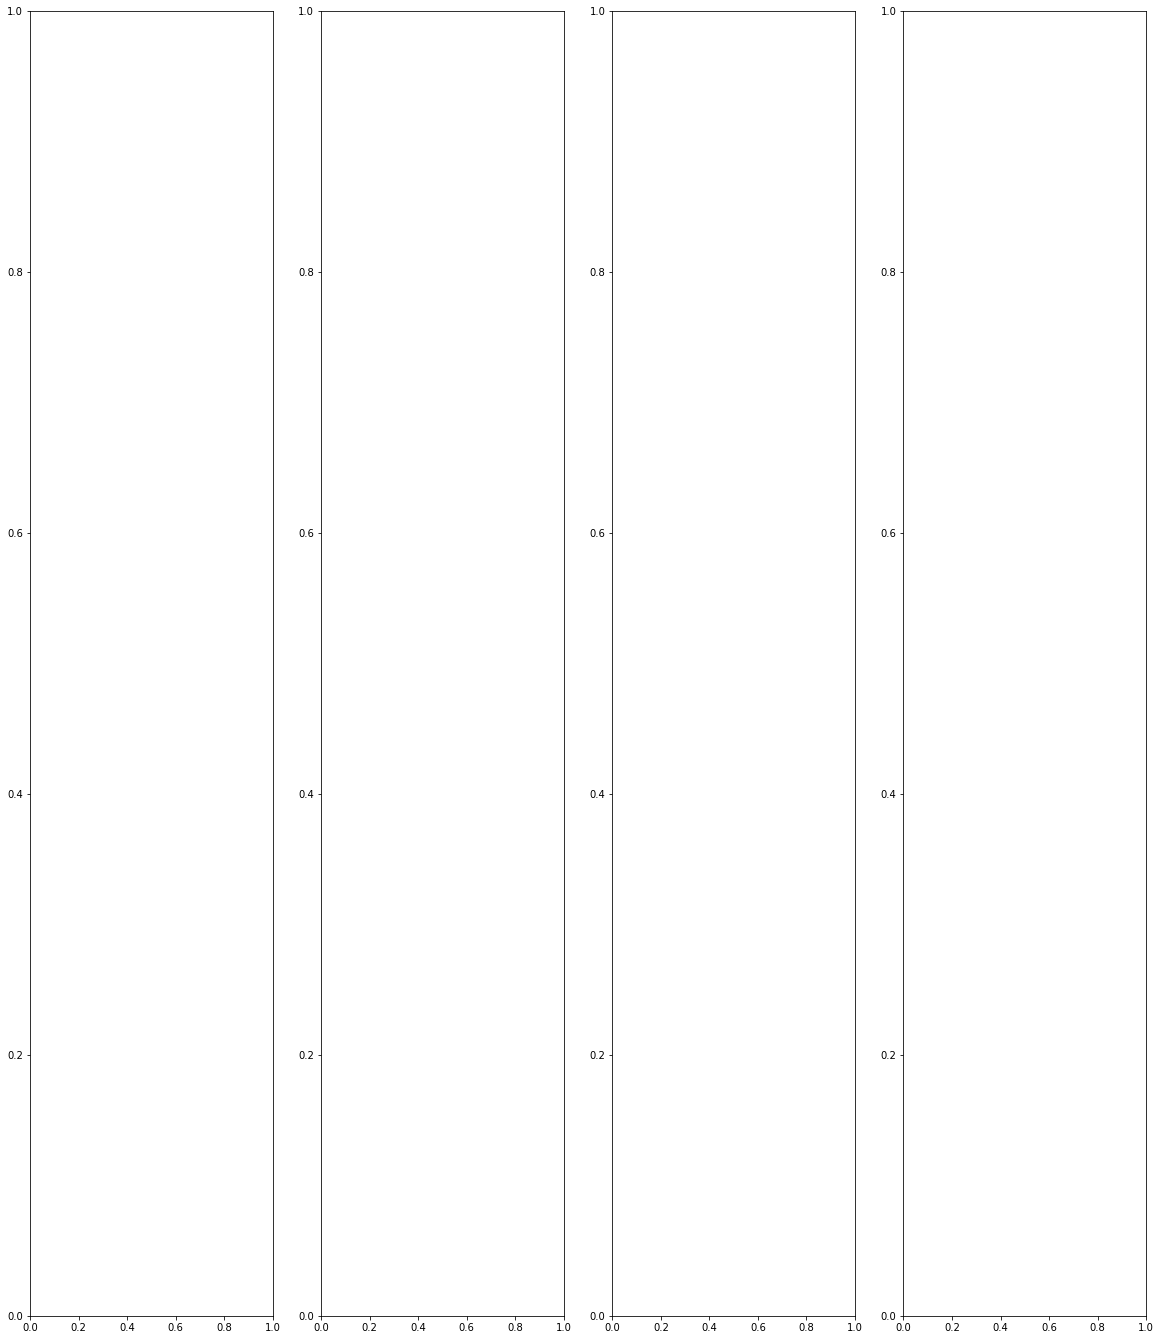

In [10]:
# run 1D only for various cutoffs:

midway3_path = './Tm-15_trajs/'
num_bp = 11
lag = 1
pstride = 1
bp_cutoff = 0.8
kb = 8.3124 / 1000

seq_list = ['CGCATATATAT', 'CCTATATATCC', 'TATAGCGATAT', 'TTTTTTTTTTT'] #['TTTTTTTTTTT'] #
base_idxs = [0, 2, 4, 6]
base_list = ['control', 'b2', 'b4', 'b6']
wc_idxs = np.array([10,19,28,37,47,57,67,77])

max_frames = 100000
pad_list = [0.05, 0.1, 0.3, 0.5]

fig, axes = plt.subplots(1, 4, figsize=(20, 24))

for seq, ax in zip(seq_list, axes):
    
    save_name = f'./save_outputs/{seq}_lag-{lag}_dict'
    save_dict = pickle.load(open(save_name, 'rb'))
    
    for base, bidx, ax in zip(base_list, base_idxs, ax_row[1:]):
        
        # load from dists files directly
        print(seq, base)
        dists_path = glob.glob(f'../abasic_dists/{seq}_msm_add-Tms/{base}_*')[0]
        temp = int(dists_path.split('_T-')[-1][:3])
        equ_dists = np.load(dists_path)[:, -max_frames:, :]
        print('loaded dists  ', equ_dists.shape)
        
        # vary cutoff here
        for pad in pad_list:
        
            # get all wc pairs for nbps plots:
            all_wc_nbps = score_all_contacts(equ_dists, base, AT_cutoff=0.6+pad, GC_cutoff=0.55+pad)
            bins, fes = nbps_fes(all_wc_nbps, temp)

            # plot the nbps fes
            ax.plot(bins, fes, label=base)
            ax.set_title(seq)
            ax.set_ylim(0, 20)

            # save cvs as npys
            fes_save_name = f'./save_cvs/1Dfes_{seq}_{base}_cut-{pad}.npy'
            np.save(fes_save_name, fes)
